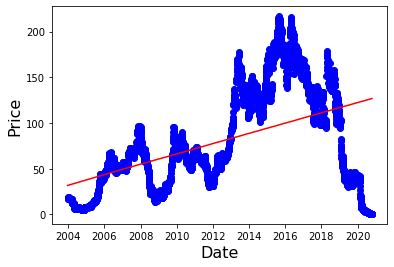

In [134]:
import pandas as panda
import numpy as np
from sklearn import linear_model
import scipy.stats as sp
import matplotlib.pyplot as plt

#importig dataset and removing unecessary colums
dataset = panda.read_csv('/Users/ainaflones/NAS.csv')
dataset = dataset.drop(['Volume','Open', 'High', 'Low', 'Adj Close'], axis='columns')

#creating a column and copying the index
dataset['Index'] = dataset.index

#removing rows with no data
dataset = dataset.dropna()

dataset['Date'] = panda.to_datetime(dataset['Date'])

#the data to be used 
input = dataset.drop(['Close','Date'], axis='columns')
pris = dataset.Close

#create linear model
regObj = linear_model.LinearRegression()
regObj.fit(input,pris)

#visualizing the graph
plt.xlabel('Date',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.scatter(dataset.Date,dataset.Close,color='blue')
plt.plot(dataset.Date,regObj.predict(input),color='red')

In [135]:
#Checking the prediction for row 3221 in the dataset. 
regObj.predict([[3221]])


array([103.78452251])

In [136]:
#the actual data for this day
print(dataset.loc[[3221]])

           Date       Close  Index
3221 2016-09-08  176.886002   3221


In [130]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#using train split test on the data 
X = input
y = pris
y = y.astype('long')
X = X.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lg = linear_model.LinearRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

# finding the average errors performed by the model, the lower the better 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#can see that this is not a good algorithm for this dataset. 
print(metrics.accuracy_score(Y_pred,y_test))

45.438796051684925
0.023696682464454975
